In [1]:
import numpy as np
import itertools
import torch
import matplotlib.pyplot as plt

from utils import conditional_dependence
from sklearn.model_selection import train_test_split

seed = 12345
np.random.seed(seed)
torch.manual_seed(seed)

In [2]:
x = np.random.normal(size=(100))*3
y = np.sin(x) + np.random.normal(size=100)*0.1
a = np.linspace(0.1,2,4)
b = np.linspace(0.1,2, 15)
c = np.linspace(-1,1, 4)
feats = []
for a_, b_, c_ in list(itertools.product(a,b,c)):
    feats.append(a_ * np.sin(b_*x + c_))
    
X = np.array(feats).T
X += np.random.normal(0,0.1,X.shape)
print(X.shape)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)


(100, 240)


In [3]:
beta = 0.2
wd = 0.1
lr = 0.05
cutoff = 0.1


def criterion(alpha):
    x_ = alpha * torch.Tensor(X_train)
    return -conditional_dependence(x_, torch.Tensor(y_train), beta=beta)


p = X_train.shape[1]
parameter_1 = torch.tensor(torch.normal(
            1, .1, (1, p)), requires_grad=True)

optimizer = torch.optim.Adam([parameter_1], lr=lr, weight_decay=wd)

n_iter = 2000

for i in range(n_iter):
    optimizer.zero_grad()
    loss = criterion(parameter_1)
    loss.backward()
    optimizer.step()

    ind = np.argwhere(parameter_1.detach().numpy().squeeze()>cutoff).squeeze()
    X_train_transf = (X_train * parameter_1.detach().numpy())[:, ind]
    X_test_transf = (X_test * parameter_1.detach().numpy())[:, ind]

/tmp/ipykernel_1883515/3647778461.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_1 = torch.tensor(torch.normal(


/tmp/ipykernel_1883515/3647778461.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_1 = torch.tensor(torch.normal(


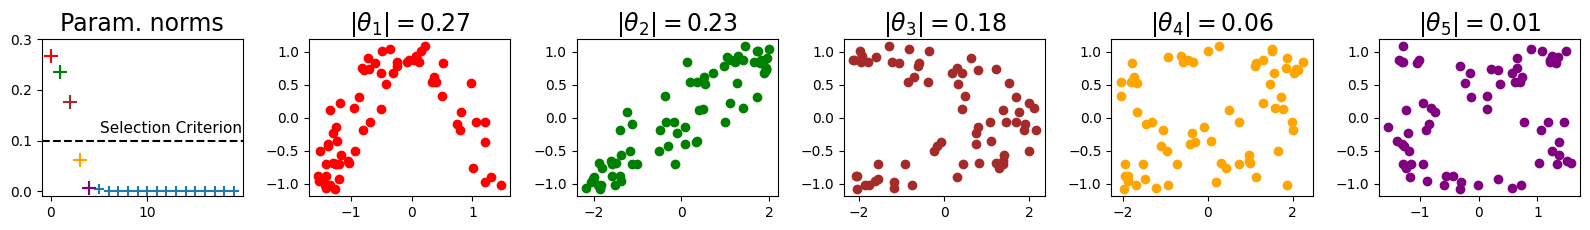

In [4]:
scale = 0.8
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(20*scale,3*scale))

k = 5
first_x = 20
indices = np.argsort(-parameter_1.detach().numpy()).squeeze()[:k]
colors=['red', 'green', 'brown', 'orange', 'purple']
axs[0].scatter(np.arange(first_x), np.flip(np.sort(parameter_1.detach().numpy())).squeeze()[:first_x], marker='+', s=50)
axs[0].scatter(0, np.flip(np.sort(parameter_1.detach().numpy())).squeeze()[0], marker='+', s=100, color=colors[0])
axs[0].scatter(1, np.flip(np.sort(parameter_1.detach().numpy())).squeeze()[1], marker='+', s=100, color=colors[1])
axs[0].scatter(2, np.flip(np.sort(parameter_1.detach().numpy())).squeeze()[2], marker='+', s=100, color=colors[2])
axs[0].scatter(3, np.flip(np.sort(parameter_1.detach().numpy())).squeeze()[3], marker='+', s=100, color=colors[3])
axs[0].scatter(4, np.flip(np.sort(parameter_1.detach().numpy())).squeeze()[4], marker='+', s=100, color=colors[4])


axs[0].set_ylim([-0.01, 0.3])
axs[0].set_title(r'Param. norms', fontsize=17)


for j in range(5):
    axs[j+1].scatter(X_train[:, indices[j]], y_train, color=colors[j])
axs[1].set_title(r'$|\theta_1'+'|=' +' '+ f'{parameter_1.detach().numpy().squeeze()[indices[0]]:.2f}' + '$', fontsize=17)
axs[2].set_title(r'$|\theta_2'+'|=' +' '+ f'{parameter_1.detach().numpy().squeeze()[indices[1]]:.2f}' + '$', fontsize=17)
axs[3].set_title(r'$|\theta_3'+'|=' +' '+ f'{parameter_1.detach().numpy().squeeze()[indices[2]]:.2f}' + '$', fontsize=17)
axs[4].set_title(r'$|\theta_4'+'|=' +' '+ f'{parameter_1.detach().numpy().squeeze()[indices[3]]:.2f}' + '$', fontsize=17)
axs[5].set_title(r'$|\theta_5'+'|=' +' '+ f'{parameter_1.detach().numpy().squeeze()[indices[4]]:.2f}' + '$', fontsize=17)

axs[0].axhline(0.1, linestyle='--', color='black')
axs[0].text(12.5, 0.11, 'Selection Criterion', ha='center', va='bottom', rotation=0, color='black', fontsize=11)

plt.tight_layout()
plt.show()
